In [133]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [134]:
class0 = np.random.normal(0, 1, (200, 2))
class0[:, 0] += class0[:, 1]
class0 += np.array([2, -1])

class1 = np.random.normal(0, 1, (200, 2))
class1[:, 0] += class1[:, 1]

data = np.vstack((class0, class1))
label = np.vstack((np.zeros((200, 1)), np.ones((200, 1))))

In [135]:
cov_within_class0 = class0.T @ class0 / (class0.shape[0] - 1)
cov_within_class1 = class1.T @ class1 / (class1.shape[0] - 1)
cov_within = (cov_within_class0 + cov_within_class1) * 0.5

means = np.vstack((np.mean(class0, axis=0), np.mean(class1, axis=0)))
cov_between = means.T @ means / (means.shape[0] - 1)

In [136]:
evals, evecs = scipy.linalg.eigh(cov_between, cov_within)
idx = np.argsort(evals)[::-1]
evals = evals[idx]
evecs = evecs[:, idx]
proj = (data - np.mean(data, axis=0)) @ evecs

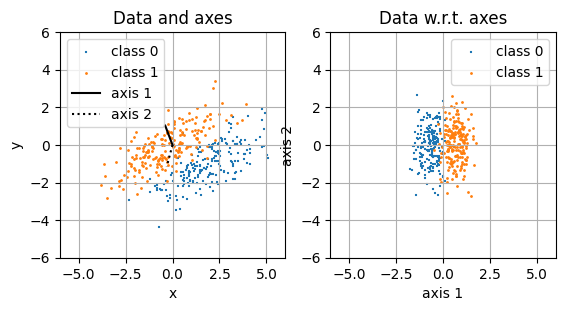

In [137]:
fig, axs = plt.subplots(1, 2)

axs[0].set_title("Data and axes")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].scatter(data[label[:, 0] == 0, 0], data[label[:, 0] == 0, 1], marker="+", label="class 0", s=1.0)
axs[0].scatter(data[label[:, 0] == 1, 0], data[label[:, 0] == 1, 1], marker="o", label="class 1", s=1.0)
axs[0].plot([0, evecs[0, 0]], [0, evecs[1, 0] * 2], "k-", label="axis 1")
axs[0].plot([0, evecs[0, 1]], [0, evecs[1, 1] * 2], "k:", label="axis 2")
axs[0].set_xlim([-6, 6])
axs[0].set_ylim([-6, 6])
axs[0].set_aspect("equal")
axs[0].grid()
axs[0].legend()

axs[1].set_title("Data w.r.t. axes")
axs[1].set_xlabel("axis 1")
axs[1].set_ylabel("axis 2")
axs[1].scatter(proj[label[:, 0] == 0, 0], proj[label[:, 0] == 0, 1], marker="+", label="class 0", s=1.0)
axs[1].scatter(proj[label[:, 0] == 1, 0], proj[label[:, 0] == 1, 1], marker="o", label="class 1", s=1.0)
axs[1].set_xlim([-6, 6])
axs[1].set_ylim([-6, 6])
axs[1].set_aspect("equal")
axs[1].grid()
axs[1].legend()

plt.show()

In [138]:
gt = label.flatten() == 0
prediction = proj[:, 0] < 0
print(f"Accuracy: {np.mean(gt == prediction)}")

Accuracy: 0.9525
